<font color=white>CHURN PREDICTION</font>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Churn Prediction

</div>


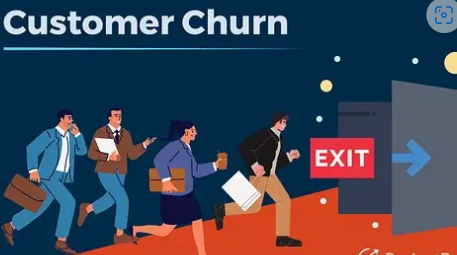

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Churn prediction aim

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">


 
⚙️ Identifying which customers are most likely to leave allows businesses to take preemptive actions to retain them.Understanding the factors influencing churn empowers companies to take effective retention actions.


⚙️ Through data analysis and predictive modeling, enterprises can pinpoint key churn-predicting factors, enabling them to allocate resources towards serving and retaining their most valuable customers.


⚙️ In this project, we'll focus on analyzing customer behavior data and building predictive models to anticipate which customers are most prone to churn. We'll employ advanced machine learning techniques to achieve optimal predictive outcomes, enabling our company to implement an effective churn management strategy. Additionally, we'll develop a dashboard in Streamlit, showcasing interesting insights and model results.
  
</div>




<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 1.1. Importing data

</div>

In [3]:
import pandas as pd
df = pd.read_csv('ECommerceDataset.csv')

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 1.2 Work planning steps
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

⚙️ **Data Analysis:**
   Conduct a thorough data analysis, including basic statistics, data visualizations, missing data analysis, outlier identification, and variable correlation analysis.

⚙️ **Data Preparation:**
   Remove unnecessary columns, handle missing data, encode categorical variables, perform feature scaling, and split the data into training and testing sets.

⚙️ **Data Balancing (Optional):**
   If there is class imbalance in the data, apply appropriate data balancing techniques such as oversampling or undersampling.

⚙️ **Model Selection:**
   Choose an appropriate model for predicting customer churn, considering the data characteristics and analysis objectives.

⚙️ **Model Training:**
   Train the selected model on the training data.

⚙️ **Model Evaluation:**
   Evaluate the model's performance on the test data using appropriate metrics such as accuracy, sensitivity, ROC curve, F1-score, etc. You can also utilize cross-validation for a more robust evaluation of the model's performance.

⚙️ **Parameter Tuning (Optional):**
   Perform model parameter tuning to optimize its performance.

⚙️ **Results Interpretation:**
   Interpret the model results to understand which variables have the greatest impact on predicting customer churn.

⚙️ **Streamlit dahboard:**
   Create interactive dashboard to enable filling it with your own variables and calculate prediction!!
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 1.3 Data characteristics-numerical variables

In [5]:
df.shape

(5630, 20)

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

**⚙️Churn Rate:** The average churn rate is approximately 16.8%, meaning that about 16.8% of customers churn from the product or service. This is important as it may suggest the need for retention efforts targeted towards this customer segment.


**⚙️Tenure Distribution:** The median tenure is 9 months, indicating that half of the customers remain on the platform for at least 9 months. Outlying values above 25 months may require further analysis to understand what makes these customers stay longer.


**⚙️Hour Spend On App:** On average, customers spend around 2.93 hours on the app, but outliers may indicate extreme behaviors worth investigating further.


**⚙️SatisfactionScore:** The average satisfaction score is 3.07 out of 5.0, but outliers on both ends may indicate customer segments requiring special attention.


**⚙️CashbackAmount:** The average cashback amount is 177.22, but outliers may indicate customers with particular preferences or purchasing behaviors.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 1.4 Missing values

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 1.4.1 Numerical values

In [7]:
# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of missing values for numerical features
missing_values_count = numerical_features.isnull().sum()

# Calculate the percentage of missing values
missing_values_percent = 100 * numerical_features.isnull().sum() / len(df)

# Create a DataFrame with the results
missing_values_df = pd.DataFrame({'Number of Missing Values': missing_values_count,
                                  'Percentage of Missing Values': missing_values_percent})

# Sort the DataFrame by the number of missing values in descending order
missing_values_df = missing_values_df.sort_values(by='Number of Missing Values', ascending=False)

# Display the results
missing_values_df


,Number of Missing Values,Percentage of Missing Values
DaySinceLastOrder,307,5.452931
OrderAmountHikeFromlastYear,265,4.706927
Tenure,264,4.689165
OrderCount,258,4.582593
CouponUsed,256,4.547069
HourSpendOnApp,255,4.529307
WarehouseToHome,251,4.458259
CustomerID,0,0.000000
Churn,0,0.000000
CityTier,0,0.000000


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 1.4.2 Categorical values

In [8]:
# Select categorical features
cat_features = df.select_dtypes(include=['object'])

# Calculate the number of missing values for categorical features
missing_values_count = cat_features.isnull().sum()

# Calculate the percentage of missing values
missing_values_percent = 100 * cat_features.isnull().sum() / len(df)

# Create a DataFrame with the results
missing_values_df = pd.DataFrame({'Number of Missing Values': missing_values_count,
                                  'Percentage of Missing Values': missing_values_percent})

# Sort descending by the number of missing values
missing_values_df = missing_values_df.sort_values(by='Number of Missing Values', ascending=False)

# Display the results
missing_values_df


,Number of Missing Values,Percentage of Missing Values
PreferredLoginDevice,0,0.0
PreferredPaymentMode,0,0.0
Gender,0,0.0
PreferedOrderCat,0,0.0
MaritalStatus,0,0.0


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 1.4.3 Top frequency of categorical values

In [9]:

# Select categorical features
categorical_features = df.select_dtypes(include=['object'])

# Summary statistics for categorical variables
cat_summary_stats = categorical_features.describe().T

# Display the summary statistics for categorical variables
display(cat_summary_stats)



,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

**⚙️Preferred Login Device:** This indicates that the majority of customers (2765 out of 5630) prefer to log in using a mobile phone.


**⚙️Preferred Payment Mode:**The most common preferred payment mode among customers is Debit Card, with 2314 occurrences out of 5630.


**⚙️Gender:** There are 3384 male customers out of 5630, making it the most common gender in the dataset.

**⚙️Preferred Order Category:**The most preferred order category among customers is Laptop & Accessory, with 2050 occurrences out of 5630.

**⚙️Marital Status:** The majority of customers (2986 out of 5630) are married, making it the most common marital status in the dataset.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 1.5 Missing values filling(mean or median)-numerical values

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

Determining When to Impute Numerical Columns with Median or Mean:

**⚙️Median Imputation:**

 When the numerical column exhibits non-normality, skewed distribution, or contains outliers, as the median is more robust in such cases. In situations where missing values are suspected to be non-random or related to extreme values in the distribution.

**⚙️Mean Imputation:**
When the numerical column follows a normal distribution or is approximately symmetric, as the mean provides an accurate estimate of central tendency under these conditions.In scenarios where missing values are random and do not significantly influence the distribution of the data.

The decision between median and mean imputation should be based on the distributional characteristics of the numerical column, including normality and the presence of outliers.

</div>


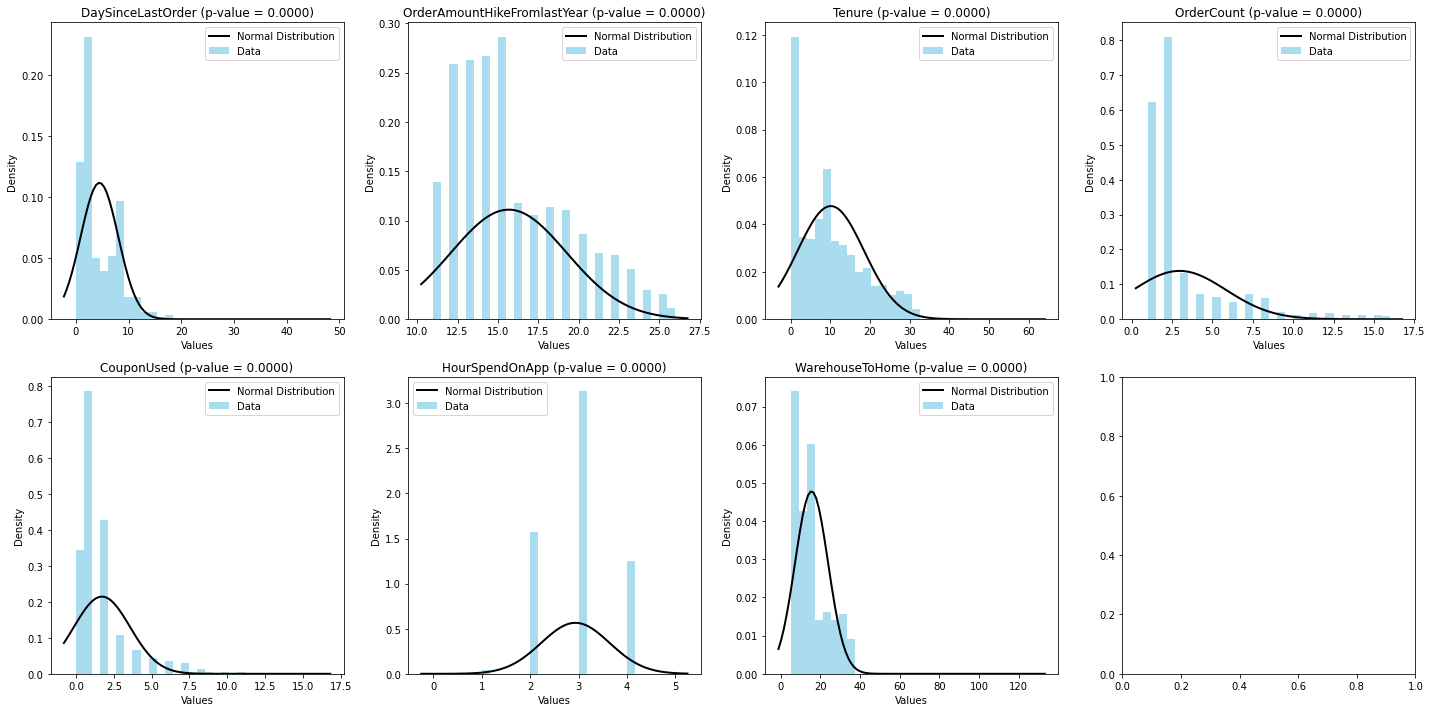

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm
import warnings

# Disable warnings
warnings.filterwarnings("ignore")

# List of columns with missing data
columns_with_missing = [
    "DaySinceLastOrder", "OrderAmountHikeFromlastYear", "Tenure", "OrderCount", "CouponUsed", "HourSpendOnApp", "WarehouseToHome"
]

# Select only numerical columns among those with missing data
numeric_values = df[columns_with_missing].select_dtypes(include=[np.number])

# Create histograms for numerical variables side by side
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, column in enumerate(numeric_values.columns):
    data = df[column].dropna()
    
    # Check the distribution of data (Shapiro-Wilk test)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        _, p_value = shapiro(data)
    
    # Create a histogram for each variable side by side
    row = i // 4
    col = i % 4
    
    axes[row, col].hist(data, bins=30, color='skyblue', alpha=0.7, label='Data', density=True)
    
    # Compare with the normal distribution
    mu, std = norm.fit(data)
    xmin, xmax = axes[row, col].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[row, col].plot(x, p, 'k', linewidth=2, label='Normal Distribution')
    
    axes[row, col].set_title(f'{column} (p-value = {p_value:.4f})')
    axes[row, col].set_xlabel('Values')
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()

plt.tight_layout()
plt.show()


In [15]:

from scipy.stats import shapiro

# List of columns with missing data
columns_with_missing = [
    "DaySinceLastOrder", "OrderAmountHikeFromlastYear", "Tenure", "OrderCount", "CouponUsed", "HourSpendOnApp", "WarehouseToHome"
]

# Creating an empty list to store the names of columns with a normal distribution
normal_distribution_columns = []

# Iterating through columns with missing data
for column in columns_with_missing:
    data = df[column].dropna()
    
    # Checking the distribution of the data (Shapiro-Wilk test)
    _, p_value = shapiro(data)
    
    # If the p-value is greater than 0.05, the distribution is considered normal
    if p_value > 0.05:
        normal_distribution_columns.append(column)

# Displaying the names of columns with a normal distribution
print("Columns with normal distribution:", normal_distribution_columns)

# Filling missing values with the mean or median for columns with a normal distribution
for column in columns_with_missing:
    # Checking whether to fill with mean or median based on the normal distribution
    if df[column].isnull().sum() > 0:
        if column in normal_distribution_columns:
            # Filling missing values with the mean
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            print(f"Missing values in the column {column} have been filled with the mean.")
        else:
            # Filling missing values with the median
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)
            print(f"Missing values in the column {column} have been filled with the median.")

# Displaying the final count of missing values in numeric columns
missing_values_count = df[columns_with_missing].isnull().sum()
print("\nFinal count of missing values in numeric columns:")
print(missing_values_count)


Columns with normal distribution: []

Final count of missing values in numeric columns:
DaySinceLastOrder              0
OrderAmountHikeFromlastYear    0
Tenure                         0
OrderCount                     0
CouponUsed                     0
HourSpendOnApp                 0
WarehouseToHome                0
dtype: int64


In [16]:
median_values = df[["DaySinceLastOrder", "OrderAmountHikeFromlastYear", "Tenure", "OrderCount", "CouponUsed", "HourSpendOnApp", "WarehouseToHome"]].median()
print(median_values)


DaySinceLastOrder               3.0
OrderAmountHikeFromlastYear    15.0
Tenure                          9.0
OrderCount                      2.0
CouponUsed                      1.0
HourSpendOnApp                  3.0
WarehouseToHome                14.0
dtype: float64


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 1.5.1 Missing values filling-categorical values

In [18]:
# Select categorical variables
categorical_features = df.select_dtypes(include=['object'])

# Calculate the percentage of missing data for categorical variables
missing_values_percent = (categorical_features.isnull().sum() / len(df)) * 100

# Create a DataFrame with the results
missing_values_categorical = pd.DataFrame({'Percentage of Missing Data': missing_values_percent})

# Display the results
print(missing_values_categorical)
print("There is no missing values in categorical variables")


                      Percentage of Missing Data
PreferredLoginDevice                         0.0
PreferredPaymentMode                         0.0
Gender                                       0.0
PreferedOrderCat                             0.0
MaritalStatus                                0.0
There is no missing values in categorical variables


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 2.0 Outliers

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">


 Here are some suggestions to help you decide which variables to start with outlier analysis:

**⚙️Variables of High Business Significance:** If there are variables crucial from a business standpoint or have the most significant potential impact on analysis results (e.g., Tenure, OrderCount, SatisfactionScore), you may start with them.



**⚙️Variables with High Variability:** Variables with a large range of values or high variability (such as OrderAmountHikeFromlastYear, HourSpendOnApp) might be more prone to outliers and may require special attention.



**⚙️Correlation with Churn:** If your goal is to understand the impact of outliers on the Churn variable, it's worth starting with variables most correlated with Churn. You can use correlation matrices to identify these variables.



 **⚙️Variables with a High Number of Missing Values:** If there are variables with a large number of missing values, it's worth checking whether these missing values could result from the presence of outliers. If so, consider analyzing these variables first.




</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 2.1 Outliers analysis steps

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">


**⚙️Histogram:** Start by creating a histogram of variable to visualize its distribution of values. The histogram will show the predominant values and whether there are any outliers at the tails of the distribution.


**⚙️Boxplot:** Draw a boxplot of variable, which will display the quartiles of the distribution and potential outliers. Outliers may lie beyond the "whiskers" of the boxplot.


**⚙️Descriptive Statistics:** Calculate basic descriptive statistics for the variable, such as mean, median, standard deviation, and quartiles. These statistics will help you better understand the characteristics of this variable.


**⚙️IQR Method:** Utilize the Interquartile Range (IQR) method to identify outliers. Outliers can be defined as those that are more than 1.5 or 3 times the IQR above the third quartile or below the first quartile.


**⚙️Scatter Plot:** Plot a scatter plot of the variable against the Churn variable to see if there's any relationship between tenure and customer churn and whether outliers influence this relationship.

Exploring these aspects will provide insights into the presence and impact of outliers in  variable.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Tenure

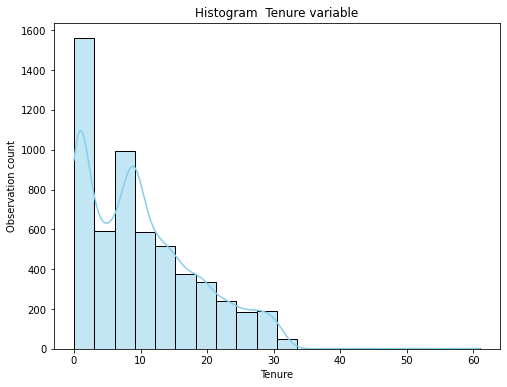

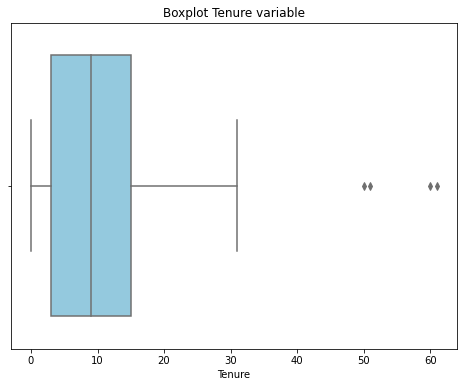

Descriptive statistics of Tenure:
count    5630.000000
mean       10.134103
std         8.357951
min         0.000000
25%         3.000000
50%         9.000000
75%        15.000000
max        61.000000
Name: Tenure, dtype: float64

Number of outliers in  Tenure variable: 4


In [21]:
import seaborn as sns
# Histogram  Tenure variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Tenure'], kde=True, bins=20, color='skyblue')
plt.title('Histogram  Tenure variable')
plt.xlabel('Tenure')
plt.ylabel('Observation count')
plt.show()

# Boxplot Tenure
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Tenure'], color='skyblue')
plt.title('Boxplot Tenure variable')
plt.xlabel('Tenure')
plt.show()

# Statistics descriptive of Tenure
tenure_stats = df['Tenure'].describe()
print("Descriptive statistics of Tenure:")
print(tenure_stats)

#  IQR method to identify outliers
Q1 = df['Tenure'].quantile(0.25)
Q3 = df['Tenure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Tenure'] < lower_bound) | (df['Tenure'] > upper_bound)]
print("\nNumber of outliers in  Tenure variable:", len(outliers))


In [22]:
outliers

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
928,50929,0,50.0,Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.0,1.0,2.0,8.0,149
2719,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,1,Married,5,1,13.0,1.0,1.0,0.0,279
3743,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Divorced,2,0,25.0,2.0,3.0,9.0,174
5534,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,15.0,1.0,2.0,1.0,304


In [25]:
# Removing Outliers from Tenure Variable
df = df[(df['Tenure'] >= lower_bound) & (df['Tenure'] <= upper_bound)]

# Checking the Number of Rows after Outlier Removal
print("Number of rows after removing outliers:", len(df))


Number of rows after removing outliers: 5626


In [26]:
df.shape

(5626, 20)

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">


**⚙️Summary:** We are removing the outliers 50, 51, 60, and 61 years because they exceed the upper bound of 33 years defined by the IQR method (3-15 years), potentially distorting statistical analyses. Eliminating these values ensures more representative measures, such as the mean and median, improving the reliability of the results.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### DaysinceLastOrder

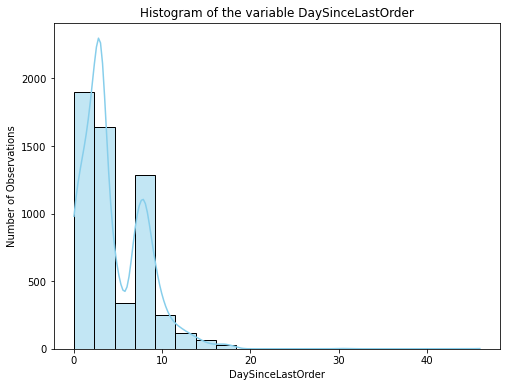

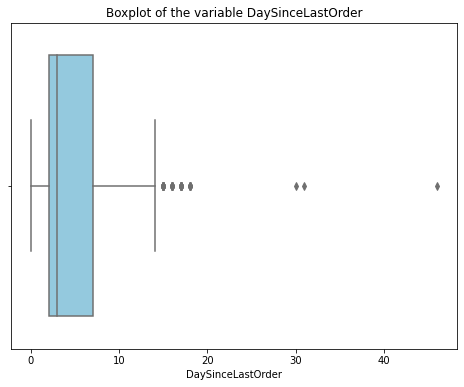

Descriptive statistics of the variable DaySinceLastOrder:
count    5626.000000
mean        4.459296
std         3.570277
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

Number of outliers in the variable DaySinceLastOrder: 62


In [558]:
# Histogram of the variable DaySinceLastOrder
plt.figure(figsize=(8, 6))
sns.histplot(df1['DaySinceLastOrder'], kde=True, bins=20, color='skyblue')
plt.title('Histogram of the variable DaySinceLastOrder')
plt.xlabel('DaySinceLastOrder')
plt.ylabel('Number of Observations')
plt.show()

# Boxplot of the variable DaySinceLastOrder
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['DaySinceLastOrder'], color='skyblue')
plt.title('Boxplot of the variable DaySinceLastOrder')
plt.xlabel('DaySinceLastOrder')
plt.show()

# Descriptive statistics of the variable DaySinceLastOrder
day_since_last_order_stats = df1['DaySinceLastOrder'].describe()
print("Descriptive statistics of the variable DaySinceLastOrder:")
print(day_since_last_order_stats)

# IQR method for identifying outliers
Q1 = df1['DaySinceLastOrder'].quantile(0.25)
Q3 = df1['DaySinceLastOrder'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df1[(df1['DaySinceLastOrder'] < lower_bound) | (df1['DaySinceLastOrder'] > upper_bound)]
print("\nNumber of outliers in the variable DaySinceLastOrder:", len(outliers))


In [559]:
outliers

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
28,50029,0,18.0,Phone,1,14.0,Debit Card,Male,2.0,3,Laptop & Accessory,4,Married,9,0,18.0,1.0,1.0,15.0,123
62,50063,0,28.0,Mobile Phone,1,20.0,Credit Card,Male,3.0,2,Others,4,Single,9,0,11.0,1.0,2.0,15.0,287
106,50107,0,15.0,Mobile Phone,1,10.0,Cash on Delivery,Male,2.0,3,Others,2,Divorced,2,0,15.0,0.0,11.0,15.0,292
261,50262,0,10.0,Phone,1,20.0,Debit Card,Female,3.0,3,Mobile,5,Married,2,0,12.0,3.0,12.0,17.0,130
436,50437,0,25.0,Mobile Phone,3,9.0,E wallet,Male,2.0,4,Grocery,5,Divorced,2,0,11.0,1.0,1.0,16.0,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,55239,0,18.0,Mobile Phone,1,35.0,Debit Card,Male,3.0,4,Grocery,5,Married,5,0,14.0,1.0,15.0,18.0,288
5461,55462,0,31.0,Computer,3,9.0,Credit Card,Male,3.0,4,Grocery,4,Married,6,0,23.0,1.0,15.0,15.0,288
5490,55491,0,17.0,Mobile Phone,1,13.0,Credit Card,Female,3.0,5,Others,3,Married,9,0,15.0,7.0,7.0,15.0,319
5508,55509,0,14.0,Mobile Phone,1,8.0,Debit Card,Male,4.0,4,Grocery,5,Married,4,0,15.0,3.0,12.0,17.0,293


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">


**⚙️Summary:** It appears that the values of the variable "DaySinceLastOrder" for outliers are significantly higher than typical values in the dataset. For most customers, the time interval between orders ranges from 0 to 7 days (75% of values are not greater than 7). However, for outliers, these values reach up to 46 days, which greatly exceeds typical customer behavior.
Analyzing the "Churn" variable for outliers, the majority of them (54 out of 62) have a "Churn" value of 0, indicating they did not churn. However, 8 outliers have a "Churn" value of 1, suggesting churn. This observation may indicate some insight into the data. For instance, a longer time since the last order might imply that customers are less likely to churn because they may have forgotten, thus showing a consistent trend.And because of this I decide to leave these outlier values here.
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Cashback amount

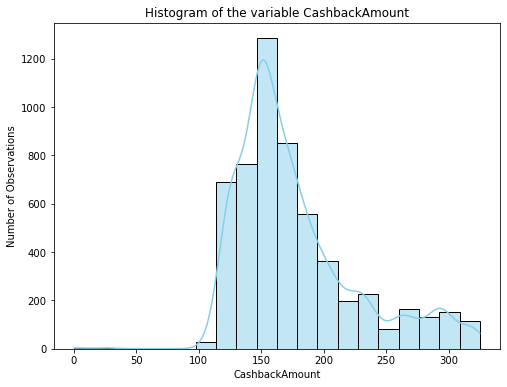

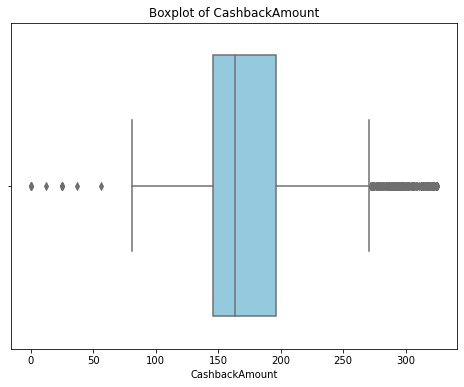

Descriptive statistics of  CashbackAmount:
count    5626.000000
mean      177.186456
std        49.162120
min         0.000000
25%       146.000000
50%       163.000000
75%       196.000000
max       325.000000
Name: CashbackAmount, dtype: float64

Number of outliers in CashbackAmount: 445


In [27]:
# Histogram of the variable CashbackAmount
plt.figure(figsize=(8, 6))
sns.histplot(df['CashbackAmount'], kde=True, bins=20, color='skyblue')
plt.title('Histogram of the variable CashbackAmount')
plt.xlabel('CashbackAmount')
plt.ylabel('Number of Observations')
plt.show()

# Boxplot CashbackAmount
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CashbackAmount'], color='skyblue')
plt.title('Boxplot of CashbackAmount')
plt.xlabel('CashbackAmount')
plt.show()

# Descriptive statistics of  CashbackAmount
cashback_amount_stats = df['CashbackAmount'].describe()
print("Descriptive statistics of  CashbackAmount:")
print(cashback_amount_stats)

# IQR 
Q1 = df['CashbackAmount'].quantile(0.25)
Q3 = df['CashbackAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['CashbackAmount'] < lower_bound) | (df['CashbackAmount'] > upper_bound)]
print("\nNumber of outliers in CashbackAmount:", len(outliers))


In [561]:
# Displaying the values of the CashbackAmount and Churn variables for outliers
outliers_cashback_and_churn = outliers[['CashbackAmount', 'Churn']]
print("Values of CashbackAmount and Churn variables for outliers:")
print(outliers_cashback_and_churn)



Values of CashbackAmount and Churn variables for outliers:
      CashbackAmount  Churn
10               295      1
40               299      0
61               290      0
62               287      0
65               300      0
...              ...    ...
5511             297      0
5537             317      0
5561             321      0
5597             319      0
5603             314      0

[445 rows x 2 columns]


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Interesting scenarios

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
Analyzing cashback in relation to churn can provide valuable insights into customer behavior and the effectiveness of loyalty programs. Here are some interesting scenarios and observations:
    
       

**⚙️High cashback, high churn:** There are cases where customers receive high cashback but churn. This suggests that a loyalty program offering not enough attractive benefits .
       
 
    
    
    
**⚙️Low cashback, low churn:** Other cases may show that despite receiving low cashback, customers decide to stay. 
    
</div>


In [28]:
# Cases: High cashback and churn (Churn = 1, CashbackAmount > 300)
high_cashback_high_churn = outliers[(outliers['Churn'] == 1) & (outliers['CashbackAmount'] > 300)][['Churn', 'CashbackAmount']]

# Cases: Low cashback and low churn (Churn = 0, CashbackAmount <= 50)
low_cashback_low_churn = outliers[(outliers['Churn'] == 0) & (outliers['CashbackAmount'] <= 50)][['Churn', 'CashbackAmount']]

# Number of occurrences of each case
count_high_cashback_high_churn = len(high_cashback_high_churn)
count_low_cashback_low_churn = len(low_cashback_low_churn)

print("Number of occurrences of the case: High cashback and churn:", count_high_cashback_high_churn)
print("Number of occurrences of the case: Low cashback and low churn:", count_low_cashback_low_churn)

# Displaying the results
print("\nCases: High cashback and churn:")
print(high_cashback_high_churn)

print("\nCases: Low cashback and low churn:")
print(low_cashback_low_churn)


Number of occurrences of the case: High cashback and churn: 10
Number of occurrences of the case: Low cashback and low churn: 10

Cases: High cashback and churn:
      Churn  CashbackAmount
2825      1             320
3258      1             324
3285      1             317
3439      1             323
3603      1             313
4205      1             320
4728      1             324
4755      1             317
4909      1             323
5073      1             313

Cases: Low cashback and low churn:
      Churn  CashbackAmount
101       0               0
1026      0               0
1176      0               0
1255      0               0
1300      0              12
2916      0              25
3841      0              25
3991      0              25
4070      0              25
4115      0              37


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
    
## Analysis of the Cases

### ⚙️High Cashback and Churn (Churn = 1, CashbackAmount > 300)
**Pattern:** High cashback, yet customers still churned.  
**Possible Reasons:** Other factors like poor service or better competitor offers.

### ⚙️Low Cashback and Low Churn (Churn = 0, CashbackAmount ≤ 50)
**Pattern:** Low cashback, but customers didn't churn.  
**Possible Reasons:** High customer loyalty or value in non-cashback areas.

## Recommendations

### Reasons to Keep These Cases
- **⚙️Customer Insight:** They provide valuable insights into customer behavior beyond cashback.
- **⚙️Segment Discovery:** These cases may reveal unique customer segments with different churn drivers.
- **⚙️Model Integrity:** Removing them without understanding their context could skew your model.

### Conclusion
Keep these cases for deeper analysis to maintain data richness and uncover meaningful patterns.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### SatisfactionScore

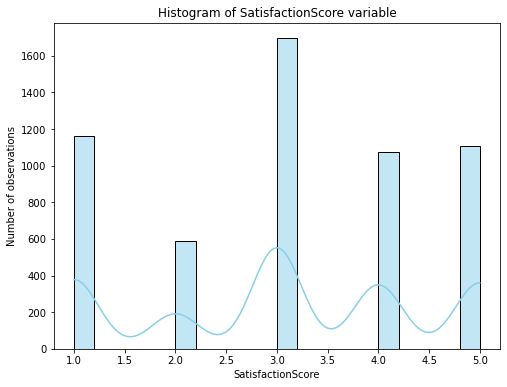

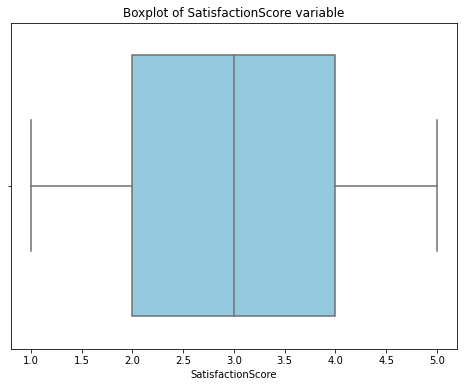

Descriptive statistics of SatisfactionScore variable:
count    5626.000000
mean        3.067544
std         1.380134
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: SatisfactionScore, dtype: float64

Number of outliers in SatisfactionScore variable: 0


In [30]:
# Histogram of the variable SatisfactionScore
plt.figure(figsize=(8, 6))
sns.histplot(df['SatisfactionScore'], kde=True, bins=20, color='skyblue')
plt.title('Histogram of SatisfactionScore variable')
plt.xlabel('SatisfactionScore')
plt.ylabel('Number of observations')
plt.show()

# Boxplot of the variable SatisfactionScore
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['SatisfactionScore'], color='skyblue')
plt.title('Boxplot of SatisfactionScore variable')
plt.xlabel('SatisfactionScore')
plt.show()

# Descriptive statistics of the SatisfactionScore variable
satisfaction_score_stats = df['SatisfactionScore'].describe()
print("Descriptive statistics of SatisfactionScore variable:")
print(satisfaction_score_stats)

# IQR method to identify outliers
Q1 = df['SatisfactionScore'].quantile(0.25)
Q3 = df['SatisfactionScore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['SatisfactionScore'] < lower_bound) | (df['SatisfactionScore'] > upper_bound)]
print("\nNumber of outliers in SatisfactionScore variable:", len(outliers))


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">


**⚙️Summary:** No outliers to remove.
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Warehouse to home

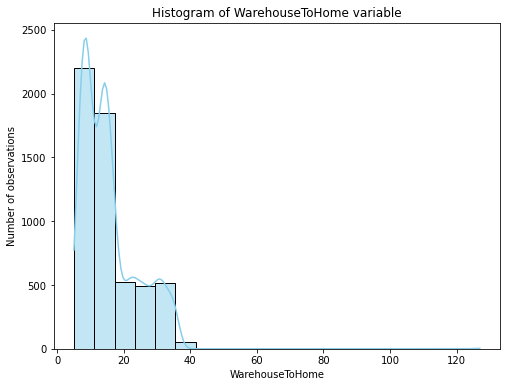

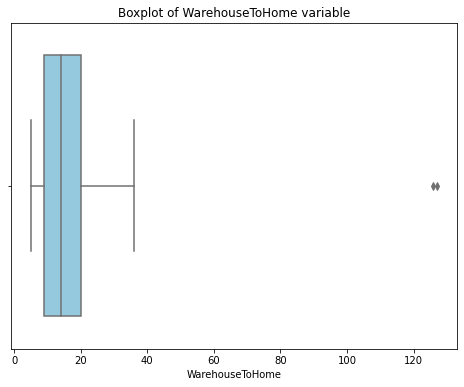

Descriptive statistics of WarehouseToHome variable:
count    5626.000000
mean       15.565766
std         8.344133
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

Number of outliers in WarehouseToHome variable: 2


In [31]:
# Histogram of the variable WarehouseToHome
plt.figure(figsize=(8, 6))
sns.histplot(df['WarehouseToHome'], kde=True, bins=20, color='skyblue')
plt.title('Histogram of WarehouseToHome variable')
plt.xlabel('WarehouseToHome')
plt.ylabel('Number of observations')
plt.show()

# Boxplot of the variable WarehouseToHome
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['WarehouseToHome'], color='skyblue')
plt.title('Boxplot of WarehouseToHome variable')
plt.xlabel('WarehouseToHome')
plt.show()

# Descriptive statistics of the WarehouseToHome variable
warehouse_to_home_stats = df['WarehouseToHome'].describe()
print("Descriptive statistics of WarehouseToHome variable:")
print(warehouse_to_home_stats)

# IQR method to identify outliers
Q1 = df['WarehouseToHome'].quantile(0.25)
Q3 = df['WarehouseToHome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['WarehouseToHome'] < lower_bound) | (df['WarehouseToHome'] > upper_bound)]
print("\nNumber of outliers in WarehouseToHome variable:", len(outliers))


In [32]:
# Displaying outliers
print("Outliers in WarehouseToHome variable:")
print(outliers)

# Removing outliers from df1
df = df[~df['WarehouseToHome'].isin(outliers['WarehouseToHome'])]


Outliers in WarehouseToHome variable:
      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1309       51310      0    25.0             Computer         3   
4124       54125      0    26.0             Computer         3   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
1309            126.0           Debit Card   Male             2.0   
4124            127.0           Debit Card   Male             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
1309                         3           Mobile                  1   
4124                         4     Mobile Phone                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1309       Married                3         0                         15.0   
4124       Married                4         0                         16.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1309         1.0         1.0               

In [36]:
# Deleting rtows
df = df[~df['CustomerID'].isin([51310, 54125])]

In [37]:
df.shape

(5624, 20)

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">


**⚙️Summary:** We decided to remove these values because they could distort our analysis. There are only a few of them, making it difficult to draw any meaningful conclusions from such extreme cases.
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 3.0 Exploratory data analysis

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 3.1 Churn percentage

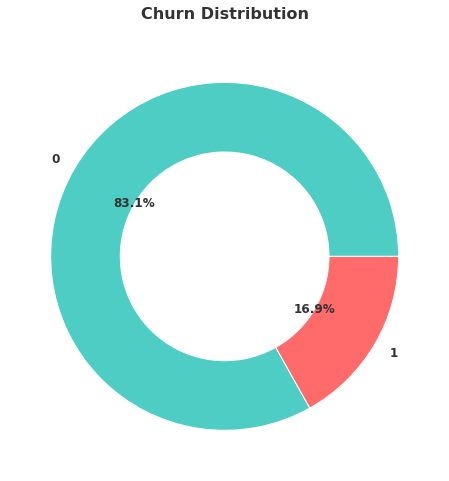

In [38]:


# Churn distribution
churn_distribution = df['Churn'].value_counts(normalize=True)

# Customizing the plot
plt.figure(figsize=(8, 8))
plt.pie(churn_distribution, 
        labels=churn_distribution.index, 
        autopct='%1.1f%%', 
        colors=['#4ECDC4', '#FF6B6B'],  # Custom colors
        wedgeprops=dict(width=0.4, edgecolor='w'),  # Adding wedgeprops for futuristic look
        textprops={'fontsize': 12, 'fontweight': 'bold', 'color': '#333333'})  # Custom text properties

# Adding title and making it stand out
plt.title('Churn Distribution', fontsize=16, fontweight='bold', color='#333333', loc='center', pad=20)

# Removing axis
plt.axis('off')

# Displaying the plot
plt.show()



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

**⚙️Summary:**

The churn rate in the dataset is approximately 16.8%, indicating that about 16.8% of customers have churned, while the remaining majority have not. This highlights the significance of understanding and addressing churn to retain customers and sustain business growth.

**⚙️Conclusion:**

Identifying and mitigating churn is crucial for businesses to maintain customer loyalty and profitability. By focusing on strategies to reduce churn and enhance customer satisfaction, companies can foster long-term relationships with their customers and drive sustainable success in the competitive market landscape.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 3.2 Heatmap and interesting correlations

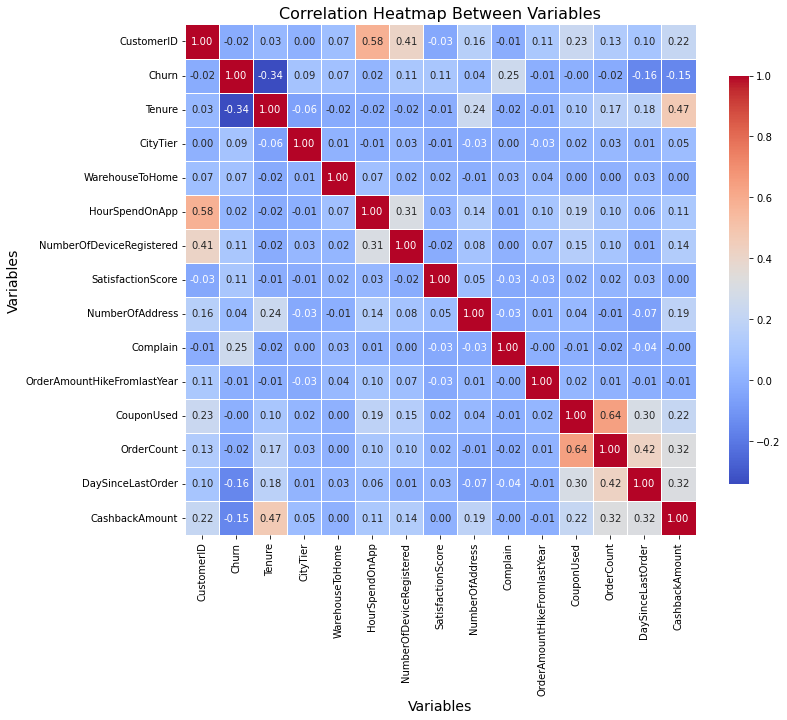

In [39]:


# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the size of the heatmap
plt.figure(figsize=(12, 10))

# Create the correlation heatmap with a calm color scheme
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm',  # Calm color scheme
            fmt=".2f", 
            linewidths=0.5, 
            square=True,  
            cbar_kws={"shrink": 0.8})  

# Add title and axis labels
plt.title('Correlation Heatmap Between Variables', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Adjust the layout
plt.tight_layout()

plt.show()


In [40]:
# Dropping the CustomerID variable
columns_to_drop = ['CustomerID']
df_without_customerid = df.drop(columns_to_drop, axis=1)

# Correlation between variables
correlation_matrix_without_customerid = df_without_customerid.corr().abs()

# Variable pairs with correlation coefficient above 0.3
highly_correlated_pairs = (correlation_matrix_without_customerid.where(np.triu(np.ones(correlation_matrix_without_customerid.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs > 0.3]
print("Variable pairs with correlation coefficient above 0.3:")
print(highly_correlated_pairs)


Variable pairs with correlation coefficient above 0.3:
CouponUsed         OrderCount                  0.641156
Tenure             CashbackAmount              0.469926
OrderCount         DaySinceLastOrder           0.421600
Churn              Tenure                      0.339664
OrderCount         CashbackAmount              0.322516
DaySinceLastOrder  CashbackAmount              0.317523
HourSpendOnApp     NumberOfDeviceRegistered    0.305764
dtype: float64


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 3.3 Variables most correlated with churn

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Tenure

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

**⚙️Tenure (Customer Tenure):** The negative correlation coefficient of -0.34 suggests that longer customer tenure within the organization reduces the likelihood of churn.Drawing a trend line on plots is useful because it helps to identify overall patterns and directions in the data, even if the relationship between variables is not linear.

</div>


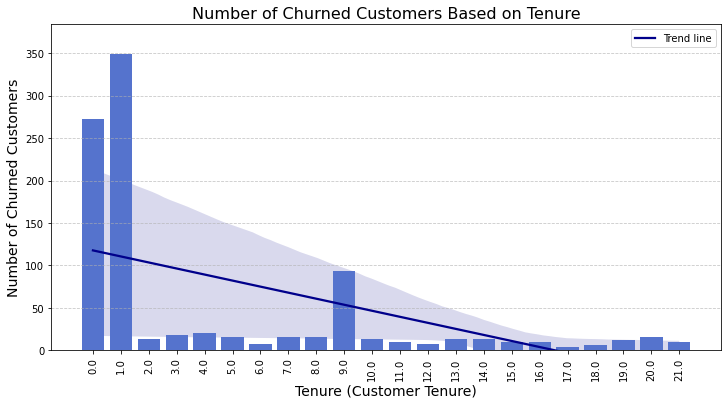

In [43]:


# Set Seaborn style with a modern business-oriented blue palette
sns.set_palette("Blues_d")

# Create a subset of data for churned customers
churned_customers = df[df['Churn'] == 1]

# Count occurrences of churn for different Tenure values
churn_counts = churned_customers['Tenure'].value_counts().sort_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, color='royalblue')

# Add a trend line with limitation
sns.regplot(x=churn_counts.index, y=churn_counts.values, color='darkblue', scatter=False, label='Trend line')

# Set y-axis limit to ensure it doesn't go below 0
plt.ylim(0, churn_counts.values.max() * 1.1)

plt.title('Number of Churned Customers Based on Tenure', fontsize=16)
plt.xlabel('Tenure (Customer Tenure)', fontsize=14)
plt.ylabel('Number of Churned Customers', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### DaySinceLastOrder

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

**⚙️DaySinceLastOrder (Number of Days Since Last Order):** The negative correlation of -0.16 indicates that a longer period since the last order reduces the likelihood of customer churn.

</div>


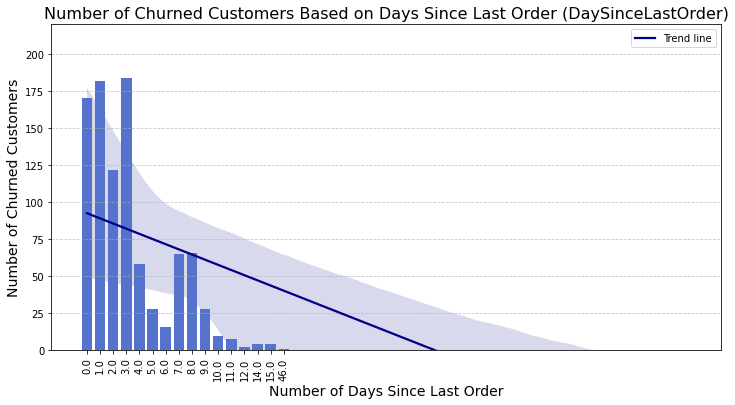

In [44]:

# Set Seaborn style with a modern business-oriented blue palette
sns.set_palette("Blues_d")

# Create a subset of data for churned customers
churned_customers = df[df['Churn'] == 1]

# Count occurrences of churn for different DaySinceLastOrder values
churn_counts = churned_customers['DaySinceLastOrder'].value_counts().sort_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, color='royalblue')

# Add a trend line
sns.regplot(x=churn_counts.index, y=churn_counts.values, color='darkblue', scatter=False, truncate=True, label='Trend line')

plt.title('Number of Churned Customers Based on Days Since Last Order (DaySinceLastOrder)', fontsize=16)
plt.xlabel('Number of Days Since Last Order', fontsize=14)
plt.ylabel('Number of Churned Customers', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Set y-axis limit to ensure the trend line ends at y=0
plt.ylim(bottom=0)

plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### CashbackAmount

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

**CashbackAmount (Cashback Amount):** The correlation coefficient of -0.15 suggests that a higher cashback amount may reduce the risk of churn.

</div>



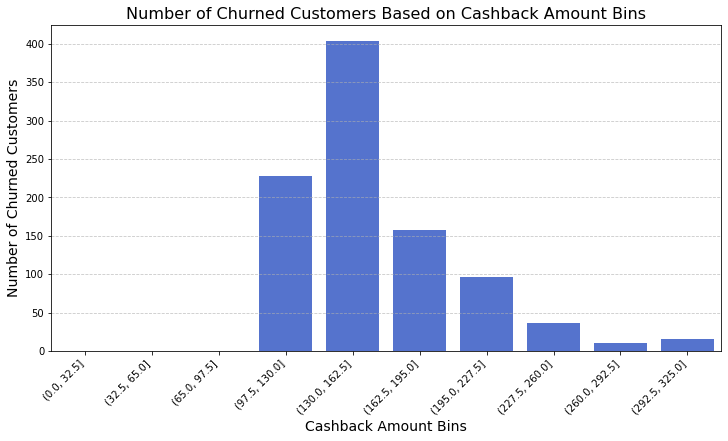

In [46]:
# Set number of bins and their widths
num_bins = 10
bins = np.linspace(df['CashbackAmount'].min(), df['CashbackAmount'].max(), num_bins+1)

# Divide cashback amount into bins
df['CashbackAmountBins'] = pd.cut(df['CashbackAmount'], bins)

# Create a subset of data for churned customers
churned_customers = df[df['Churn'] == 1]

# Count occurrences of churn for different cashback amount bins
churn_counts = churned_customers['CashbackAmountBins'].value_counts().sort_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, color='royalblue')

plt.title('Number of Churned Customers Based on Cashback Amount Bins', fontsize=16)
plt.xlabel('Cashback Amount Bins', fontsize=14)
plt.ylabel('Number of Churned Customers', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Complain

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

**⚙️Complain (Number of Complaints):** The highest positive correlation coefficient of 0.250 suggests that customer complaints may increase the risk of churn.

**⚙️Lack of Strong Correlation between Complain and Churn:** The correlation between Complain and Churn is 0.250188, which may indicate that customer complaints are not the primary factor determining churn.

</div>


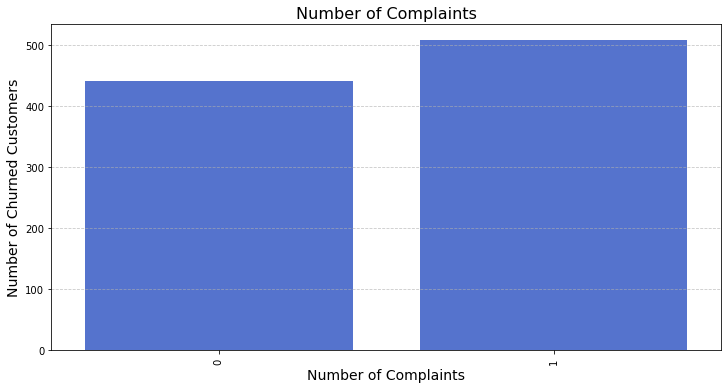

In [47]:


# Set seaborn style to business-like blue shades
sns.set_palette("Blues_d")

# Create subset of data for churned customers
churned_customers = df[df['Churn'] == 1]

# Count occurrences of churn for different values of Complain
churn_counts = churned_customers['Complain'].value_counts().sort_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, color='royalblue')

plt.title('Number of Complaints', fontsize=16)
plt.xlabel('Number of Complaints', fontsize=14)
plt.ylabel('Number of Churned Customers', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

###  PreferedOrderCat

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: left;">

**⚙️Correlation between PreferedOrderCat and Churn:** Relationship between PreferedOrderCat and Churn: Although this variable is not included in the correlation matrix, it is worth investigating its impact on churn. The preferred order category of customers may be a significant factor determining their loyalty. We can see that mobile phone users are most likely to churn.


</div>


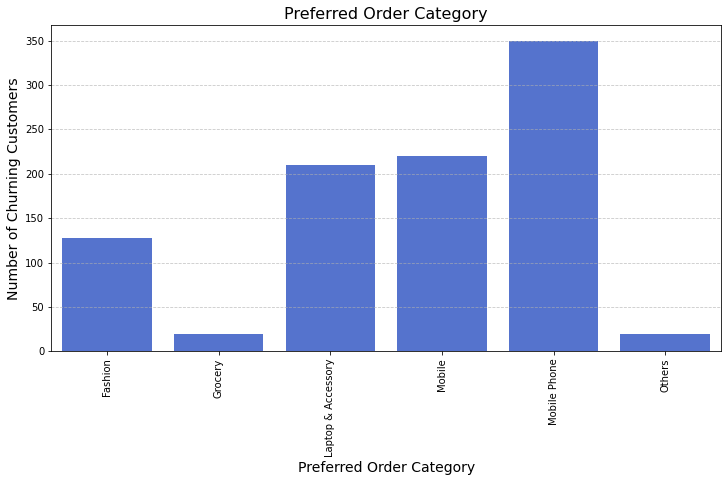

In [48]:

# Set the seaborn style to business-like blue shades
sns.set_palette("Blues_d")

# Create a subset of data for churned customers
churned_customers = df[df['Churn'] == 1]

# Count occurrences of churn for different preferred order categories
churn_counts = churned_customers['PreferedOrderCat'].value_counts().sort_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, color='royalblue')
plt.title('Preferred Order Category', fontsize=16)
plt.xlabel('Preferred Order Category', fontsize=14)
plt.ylabel('Number of Churning Customers', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 3.4 Other interesting correlations

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Cashback amount/Tenure

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: left;">


**⚙️CashbackAmount vs. Tenure**: Correlation: 0.468178

The average cashback amount received by the customer is moderately positively correlated with the tenure of the customer in the organization.


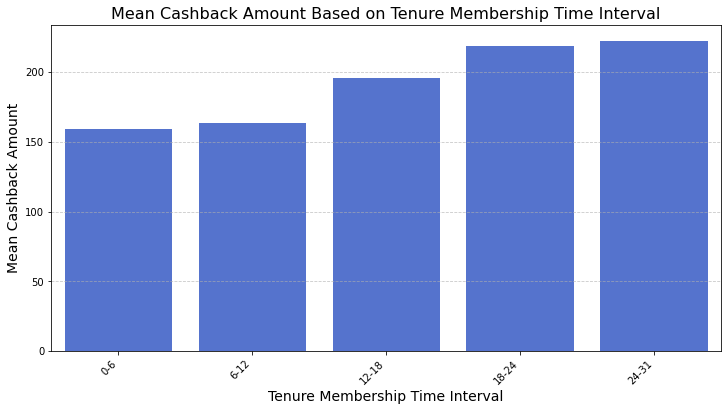

In [53]:
# Split Tenure into bins of 5
num_bins = 5
tbins = np.linspace(df['Tenure'].min(), df['Tenure'].max(), num_bins + 1)
labels = [f'{int(tbins[i])}-{int(tbins[i+1])}' for i in range(len(tbins) - 1)]

# Create a column with bins without modifying the DataFrame
df['TenureBins'] = pd.cut(df['Tenure'], bins=tbins, labels=labels, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=df['TenureBins'], y=df['CashbackAmount'], color='royalblue', estimator=np.mean, ci=None, linewidth=0)

# Setting the title and labels
plt.title('Mean Cashback Amount Based on Tenure Membership Time Interval', fontsize=16)
plt.xlabel('Tenure Membership Time Interval', fontsize=14)
plt.ylabel('Mean Cashback Amount', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### OrderCount vs. CouponUsed: Correlation: 0.64


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: left;">
⚙️ Greater number of orders is moderately positively correlated with the number of used coupons.

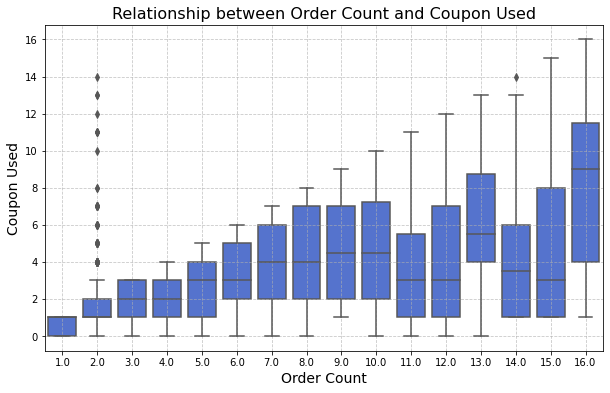

In [579]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='OrderCount', y='CouponUsed', color='royalblue')
plt.title('Relationship between Order Count and Coupon Used', fontsize=16)
plt.xlabel('Order Count', fontsize=14)
plt.ylabel('Coupon Used', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 3.5 Categorical variables plots

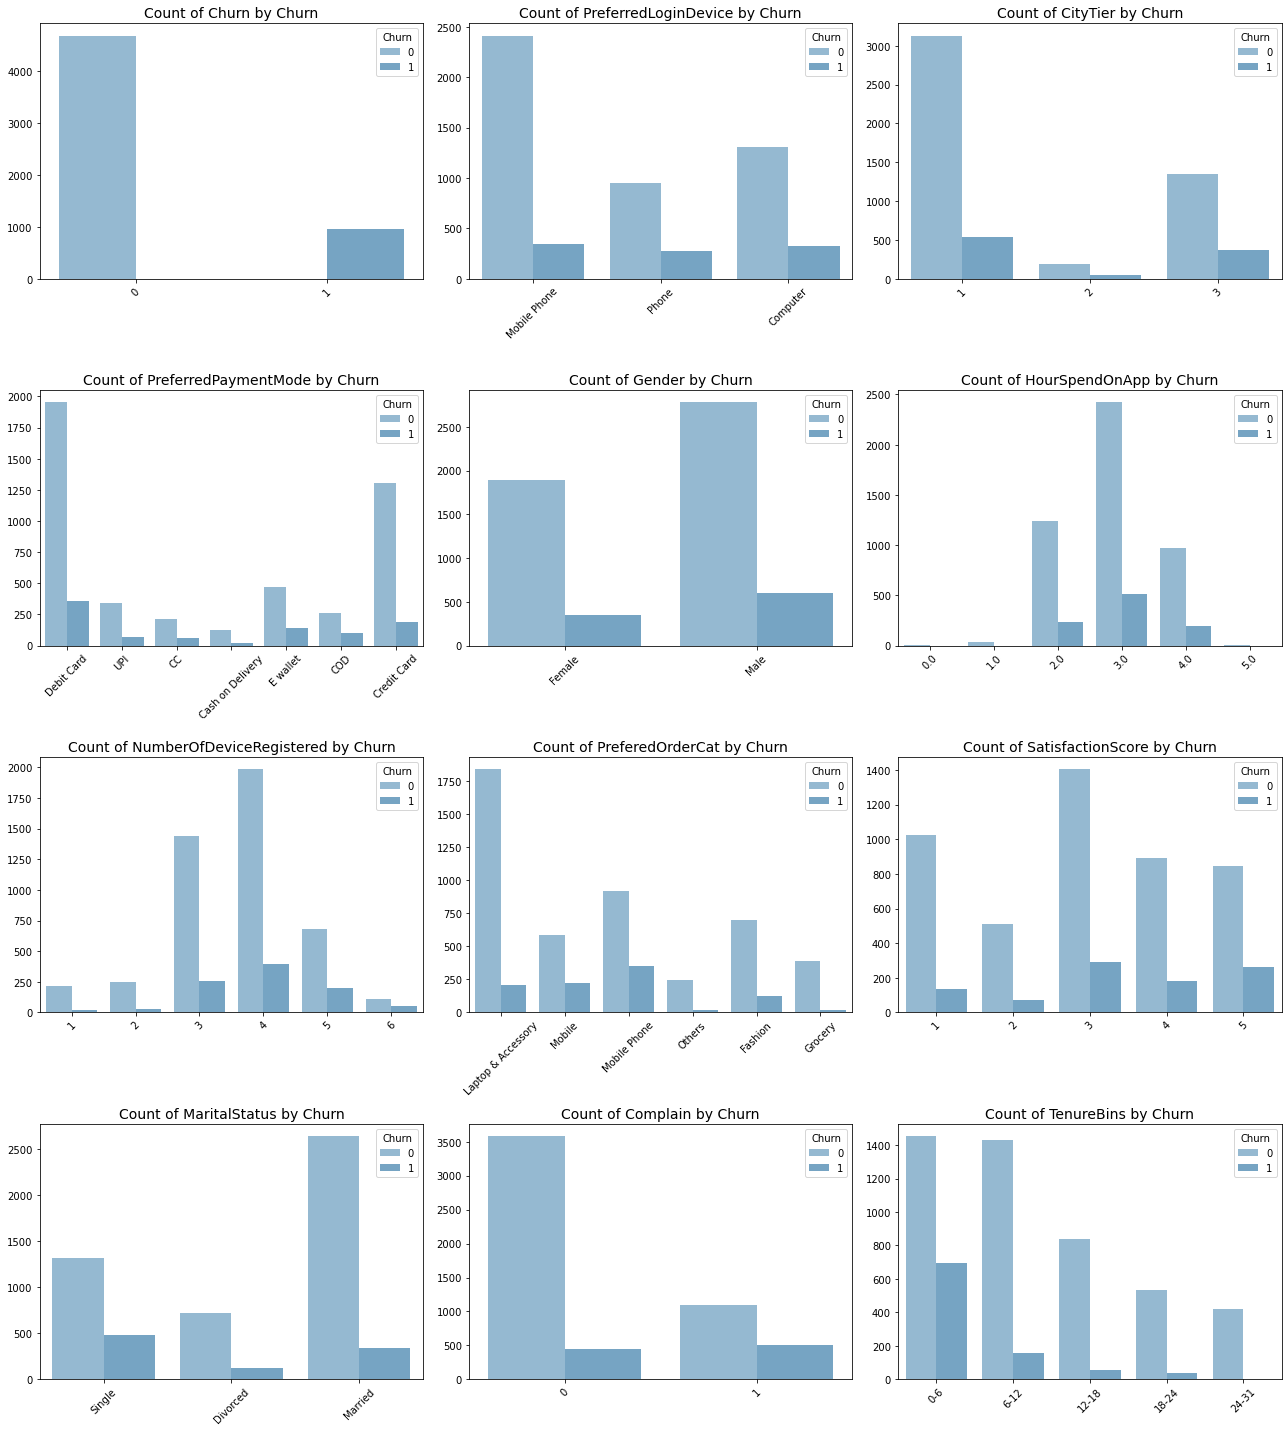

In [56]:
# List of categorical variables
categorical_variables = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() < 10]

# Calculate number of rows and columns for subplots
num_plots = len(categorical_variables)
num_rows = (num_plots // 3) + (1 if num_plots % 3 > 0 else 0)
num_cols = min(num_plots, 3)

# Set seaborn plot style to business shades of blue
sns.set_palette("Blues_d")

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

# Iterate over categorical variables and generate bar plots
for i, var in enumerate(categorical_variables):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(data=df, x=var, hue='Churn', ax=axes[row, col])
    axes[row, col].set_title(f'Count of {var} by Churn', fontsize=14)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')
    axes[row, col].legend(title='Churn', loc='upper right')
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 4. Data pipelines-preprocessing data before modelling

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

**Pipeline for Data Preprocessing**

**⚙️Column Selection:** The first step involves selecting numerical and categorical columns from the data.


**⚙️Transformer Definition:** Next, transformations are defined for each category of variables:
   - For numerical variables: Missing values are imputed using the median, and then the data is standardized (mean is removed, and data is scaled to unit variance).
   - For categorical variables: Missing values are imputed with the most frequent categories, and then variables are encoded using one-hot encoding.


**⚙️Preprocessor Definition with ColumnTransformer:** Finally, a preprocessor is created using ColumnTransformer, which applies the appropriate transformations to each category of variables while preserving other columns unchanged.

This approach allows for effective data preprocessing for machine learning, while maintaining the integrity and usefulness of the data.

</div>

In [59]:
X = df.drop(['Churn', 'CashbackAmountBins', 'CustomerID','TenureBins'], axis=1)

y = df['Churn']

In [60]:
X.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Selecting numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Defining transformer for numeric variables
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Defining transformer for categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Defining preprocessor with remainder='passthrough'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Defining the model
model = LogisticRegression()

# Creating the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">



The output array contains the preprocessed data, where each row represents an observation, and each column corresponds to a processed variable. It serves as the input data for machine learning models, facilitating further analysis and model training.
    

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 5.Modelling

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.1 Logistic regression

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">


Logistic regression uses the logistic function to transform a linear combination of explanatory variables into the probability of a binary event by logistic function. 

IF Probability of the binary event:

**⚙️( p > 0.5 \)** the model predicts that the event (e.g., churn) will occur.

**⚙️( p< 0.5 \)** the model predicts that the event will not occur.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Why begin from logistic regression?

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

**⚙️Logistic Regression** is a popular model used in predicting churn (i.e., customer attrition). It's a good choice for beginners because it's relatively easy to understand and implement, yet it can provide useful predictions.

**⚙️One of the advantages** of logistic regression is that we can interpret the influence of individual features on the prediction. We can see which factors have a greater impact on the likelihood of a customer leaving and in what way.

**⚙️However**, it's important to remember that logistic regression has its limitations, such as handling non-linear relationships between variables. Therefore, it can be used as a starting point, but later on, it's worth exploring more advanced models, especially if the data is more complex.

</div>


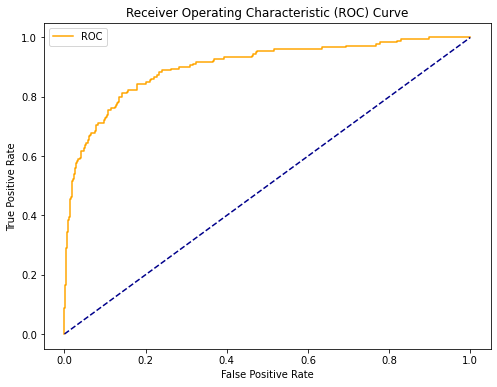

Cross-Validation Mean Accuracy: 0.8888649116302064
Accuracy: 0.9084444444444445
ROC AUC Score: 0.7746031746031746
Confusion Matrix:
 [[918  27]
 [ 76 104]]


In [63]:

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the pipeline with cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Prediction on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating ROC curve
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("Cross-Validation Mean Accuracy:", cv_scores.mean())
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

**⚙️Accuracy:** The model correctly classified around 88% of all cases. This means that overall, the model does well in predicting whether a customer will churn or not.

**⚙️ROC AUC Score:** The score of 0.77 indicates that the model has a moderately good ability to distinguish between customers who will churn and those who will stay. It's better than random guessing, but there is still room for improvement to achieve more precise predictions.

**⚙️Confusion Matrix:** It's worth noting that we have a relatively large number of false positive cases (76), which means that the model sometimes predicts a customer will churn when they actually stay. This may suggest that the model is more inclined to predict churn than retention. However, the number of false negative cases (27) is lower, indicating that the model is more conservative in predicting customer retention when they actually churn.

In summary, the model achieved high overall accuracy but may benefit from better balance in predicting both classes to avoid over-predicting customer churn.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Other models

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

⚙️In summary, although XGBoost and CatBoost are advanced and effective prediction models, they can be more complex to use and require greater computational resources compared to Random Forest, Gradient Boosting, and Support Vector Machine. Therefore, it may be beneficial to consider these three basic models as the initial steps in data exploration before potentially resorting to XGBoost or CatBoost if needed.

</div>


In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline

# Definition of models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Initial values for comparison
best_model_name = None
best_model_accuracy = 0
best_pipeline = None

# Loop over models
for model_name, model in models.items():
    # Create a pipeline with the model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Cross-validation on the model
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)  # Use 5-fold cross-validation
    
    # Average accuracy for all folds
    accuracy = scores.mean()
    print(f"Average cv Accuracy with {model_name}: {accuracy}")
    
    # Update the best model
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = model_name
        best_pipeline = pipeline

# Train the best pipeline on the full training set
best_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = best_pipeline.predict(X_test)

# Display confusion matrix and classification report for the best model
print(f"\nBest model: {best_model_name} with average accuracy: {best_model_accuracy}")
#print(f"Confusion Matrix with {best_model_name}:\n", confusion_matrix(y_test, y_pred))
#print(f"Classification Report with {best_model_name}:\n", classification_report(y_test, y_pred))


Average Accuracy with Random Forest: 0.9526560375726115
Average Accuracy with Gradient Boosting: 0.9084226918798665
Average Accuracy with Support Vector Machine: 0.9073135582746261

Best model: Random Forest with average accuracy: 0.9526560375726115
Confusion Matrix with Random Forest:
 [[940   5]
 [ 27 153]]
Classification Report with Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       945
           1       0.97      0.85      0.91       180

    accuracy                           0.97      1125
   macro avg       0.97      0.92      0.94      1125
weighted avg       0.97      0.97      0.97      1125



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
Based on the results, the best model is Random Forest, as it achieved the highest cross validation  accuracy (0.953) among the tested models. Additionally, the precision for class 1 (0.97) is very high, indicating that the model is highly effective in identifying true positive churn cases. The recall for class 1 (0.85) and the F1-score for class 1 (0.91) are also at high levels, suggesting that the model is capable of correctly identifying most churn cases.

Further steps may include:

1. Fine-tuning the Random Forest model by tuning hyperparameters.
2. Applying different resampling techniques (if necessary) to address class imbalance.
3. Exploring other data processing methods or adding new features.
4. Testing additional models to achieve better results.

By following these steps, you can optimize the model and improve its performance in predicting churn.
</div>








<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Random forest overview

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

### Ensemble Learning Algorithm:
Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. Each tree is trained on random subsets of the data and features. The final prediction is made based on the majority vote or the average of the individual trees' predictions.

### Variance Reduction:
By training on random samples and features, and aggregating the results of many trees, Random Forest reduces the variance of the model, making it less prone to overfitting compared to individual decision trees.

### High Accuracy:
Random Forest often achieves higher accuracy than individual decision trees, especially when a large number of trees are used. It captures complex relationships in the data better and achieves higher predictive performance.

### Handling Different Data Types:
Random Forest can handle various types of data, both numerical and categorical, without requiring extensive preprocessing.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Random Forest in Predicting Customer Churn


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

### Capturing Non-Linear Relationships:
Random Forest is effective in predicting customer churn due to its ability to handle non-linear relationships between features and the target variable. This helps in identifying important features influencing customer decisions.

### Feature Importance:
The algorithm can identify important features that contribute to churn, aiding in better predictions. This is particularly useful for understanding the factors driving customer behavior.

### Ease of Use and Tuning:
Random Forest is relatively easy to use and has fewer hyperparameters to tune compared to other advanced algorithms, making it a practical choice for many applications.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

### Less Sensitivity to Imbalanced Data:
Random Forest is less sensitive to imbalanced data than logistic regression. The aggregation of multiple trees allows it to handle minority classes better.

### Overfitting Resistance:
Random Forest tends to generalize better to new data and avoids overfitting to minority classes, making it a robust choice for imbalanced datasets.

### Identifying Important Features:
The algorithm excels in identifying important features even in imbalanced datasets, as it considers different sets of features in its trees, leading to better feature importance assessment.

### Flexibility with Resampling Techniques:
Random Forest can be easily integrated with various resampling techniques like oversampling, undersampling, or a combination to balance the classes in the training data.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Summary

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

Random Forest is often a better choice than logistic regression for imbalanced datasets due to its robustness against class imbalance, resistance to overfitting, and ability to identify important features. It is effective in predicting customer churn, capturing non-linear relationships, and handling various data types. While advanced algorithms like XGBoost and CatBoost offer additional advantages, starting with simpler and more interpretable models like Random Forest can provide valuable insights and a strong performance baseline.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Further steps

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

Since Random Forest achieved the best results in predicting churn in your case, focusing on further optimizing this model is a good direction. Here are some suggestions to help improve the Random Forest model:

**Hyperparameter Tuning:** Perform hyperparameter tuning for parameters such as the number of trees in the forest (n_estimators), maximum tree depth (max_depth), minimum samples required to split a node (min_samples_split), etc. This can optimize the model for your specific dataset and help avoid overfitting.

**Cross-Validation:** Ensure you use cross-validation when training and evaluating the model to obtain more stable and reliable results.

**Class Balancing:** If class imbalance is still an issue, consider applying class balancing techniques such as weighted cost functions, undersampling, oversampling, or combinations of these methods.

**Ensemble Methods:** Consider using ensemble methods like stacking or bagging to combine multiple models and enhance overall performance.

</div>




<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Class imbalance data

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

**Problem of Class Imbalance:**
The problem of class imbalance arises when the dominant class (in this case, customers who do not churn) may have too much influence on the model learning process at the expense of the minority class (customers who churn). This can lead to a suboptimal model that does not perform well in predicting the rarely occurring class.

**Solutions:**
1. Utilizing sampling methods such as oversampling (increasing the number of instances of the minority class) or undersampling (reducing the number of instances of the dominant class).
2. Employing class weighting techniques where greater weight is assigned to the minority class.
3. Leveraging machine learning algorithms specifically designed to handle class imbalance, such as Random Forest, XGBoost, or SVM with properly tuned parameters.
4. Employing evaluation metrics that account for class imbalance, such as F1-score or precision-recall curve.

</div>

Class distribution:
0    4676
1     948
Name: Churn, dtype: int64


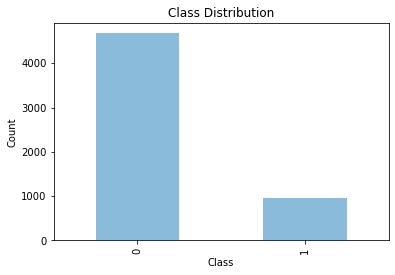

Class ratio: 4.932489451476793


In [75]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Class distribution analysis
class_distribution = df['Churn'].value_counts()
print("Class distribution:")
print(class_distribution)

# Visualize class distribution
class_distribution.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Imbalanced dataset metrics
class_ratio = class_distribution[0] / class_distribution[1]
print("Class ratio:", class_ratio)



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## SMOTE

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

"In the previous code, we have already accounted for the fact that the data is imbalanced by setting `class_weight='balanced'` in the Random Forest model. This technique automatically adjusts the class weights in the model proportionally to the inverse of the class frequencies in the training data, which helps in dealing with imbalanced data.

However, if you would like to further improve the model's performance on imbalanced data, we can consider using oversampling or undersampling techniques. In this case, since the model's performance is already quite high, we can focus on oversampling techniques. One popular oversampling technique is the Synthetic Minority Over-sampling Technique (SMOTE), which generates artificial examples for the minority class to balance the class distribution.

Here's how we can apply SMOTE to our pipeline:"

</div>


In [76]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Podział danych na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wybór kolumn numerycznych i kategorycznych
numer = X.select_dtypes(include=['int64', 'float64']).columns
categ = X.select_dtypes(include=['object']).columns

# Definicja transformatora dla zmiennych numerycznych
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Definicja transformatora dla zmiennych kategorycznych
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Definicja preprocesora z użyciem remainder='passthrough'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numer),
        ('cat', categorical_transformer, categ)
    ],
    remainder='passthrough'
)

# Definicja modelu Random Forest z ustawieniem class_weight='balanced'
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Tworzenie pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', SMOTE(random_state=42)),  # Dodajemy SMOTE jako część pipeline'u
    ('model', model)
])

# Definicja siatki hiperparametrów do przeszukania
param_distributions = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    # Dodaj inne hiperparametry do dostrojenia, jeśli to konieczne
}

# Inicjalizacja RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Dopasowanie RandomizedSearchCV do danych treningowych
random_search.fit(X_train, y_train)

# Najlepsze parametry
print("Best Parameters:", random_search.best_params_)

# Ocena najlepszego modelu na danych testowych
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Ocena modelu
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__max_depth': 20}
Accuracy: 0.9591111111111111
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       945
           1       0.91      0.83      0.87       180

    accuracy                           0.96      1125
   macro avg       0.94      0.91      0.92      1125
weighted avg       0.96      0.96      0.96      1125

Confusion Matrix:
 [[930  15]
 [ 31 149]]



Here's why it works well:

class_weight='balanced': Setting this option in the Random Forest model automatically adjusts the class weights proportionally to the inverse of the class frequencies in the training data. This means that the smaller class will have a greater influence on model learning, helping to balance the impact of both classes on the model.

SMOTE (Synthetic Minority Over-sampling Technique): Adding SMOTE to the pipeline allows for generating synthetic samples for the minority class, thereby increasing the minority class's prevalence. As a result, our model has more examples to learn from the minority class, which can improve its ability to recognize it.

Using both of these techniques together can significantly enhance the model's performance on imbalanced data. However, it's worth noting that applying SMOTE may increase the risk of overfitting, especially if applied directly to the entire dataset. Therefore, it's important for SMOTE to be part of the pipeline within the cross-validation process to avoid information leakage and prevent overfitting.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## More advanced models

In [78]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Definition of preprocessors (assuming 'numer' and 'categ' are already defined)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numer),
        ('cat', categorical_transformer, categ)
    ]
)

# Definition of models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, verbosity=0),  # Suppress XGBoost warnings
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1)  # Suppress LightGBM warnings
}

# Initial values for comparison
best_model_name = None
best_model_accuracy = 0

# Loop through models
for model_name, model in models.items():
    # Create pipeline with model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Cross-validation on the model
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)  # Use 5-fold cross-validation
    
    # Mean accuracy across all folds
    accuracy = scores.mean()
    print(f"Average Accuracy with {model_name}: {accuracy}")
    
    # Update the best model
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = model_name

# Select the best model
print(f"\nBest model: {best_model_name} with average accuracy: {best_model_accuracy}")


Average Accuracy with Random Forest: 0.9526560375726115
Average Accuracy with Gradient Boosting: 0.9084226918798665
Average Accuracy with Support Vector Machine: 0.9073135582746261
Average Accuracy with XGBoost: 0.9613239401804474
Average Accuracy with LightGBM: 0.9559898652824126

Best model: XGBoost with average accuracy: 0.9613239401804474


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## XGBoost

In [79]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Assuming X and y are already defined
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecting numerical and categorical columns
numer = X_train.select_dtypes(include=['int64', 'float64']).columns
categ = X_train.select_dtypes(include=['object']).columns

# Definition of preprocessors
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numer),
        ('cat', categorical_transformer, categ)
    ]
)

# Definition of the XGBoost model with eval_metric to suppress warnings
model = XGBClassifier(random_state=42, eval_metric='logloss', verbosity=0)

# Creating a pipeline with the model and SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', model)
])

# Cross-validation on the model
scores = cross_val_score(pipeline, X_train, y_train, cv=5)  # Use 5-fold cross-validation

# Mean accuracy across all folds
average_accuracy = scores.mean()
print(f"Average Accuracy with XGBoost: {average_accuracy}")

# Training the model on the entire training set
pipeline.fit(X_train, y_train)

# Prediction on the test set
y_pred = pipeline.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


Average Accuracy with XGBoost: 0.9582133234458041
Accuracy on Test Set: 0.9653333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       945
           1       0.90      0.88      0.89       180

    accuracy                           0.97      1125
   macro avg       0.94      0.93      0.93      1125
weighted avg       0.97      0.97      0.97      1125

Confusion Matrix:
 [[928  17]
 [ 22 158]]


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: left;">

### XGBoost Model Results Interpretation

**Key Insights:**
- **The model performs exceptionally well in distinguishing between the two classes, achieving high precision and recall for both. The high accuracy, precision, and recall indicate the model's robustness and reliability. The balanced performance across metrics suggests that the model is not only accurate but also effective in minimizing both false positives and false negatives.
- **The results of the XGBoost model on the given dataset are quite promising. The model achieved an average accuracy of 0.9582 during 5-fold cross-validation on the training set. On the test set, the accuracy was slightly higher at 0.9653.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: left;">

### Evaluation Scope:

- **First Code Segment:**
  - Uses only the average accuracy from cross-validation to compare models.

- **Second Code Segment:**
  - Also evaluates the final model on the test set and provides detailed evaluation metrics (accuracy, classification report, confusion matrix).

### When to Use Each Approach:

- **First Code Segment:**
  - Use this approach when you want to compare the performance of different models to select the best one for your dataset.
  - It helps to understand which model performs best without further tuning.

- **Second Code Segment:**
  - Use this approach when you want to focus on a single model and ensure it handles imbalanced data effectively.
  - It is more detailed and includes an evaluation of the model on the test set, providing a comprehensive overview of the model's performance.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Why XGBoost can be better than logistic regression/random forest for churn prediction?

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: left;">

### Why XGBoost Might Be Better for Predicting Churn than Logistic Regression and Random Forest

**XGBoost (Extreme Gradient Boosting):**

- **Boosting Algorithm:** XGBoost is based on the boosting technique, which iteratively improves the errors of previous models, allowing for very accurate and stable predictions. 
- **Computational Optimizations and Regularization:** XGBoost utilizes computational optimizations and regularization to prevent overfitting and enhance performance on test sets.
- **Better Handling of Imbalanced Data:** XGBoost has built-in features that handle imbalanced data more effectively, such as the ability to assign weights to individual classes.
- **Flexibility and Data Adaptation:** With the ability to tune numerous hyperparameters, XGBoost can be better tailored to the specific characteristics of churn data.

**Comparison with Logistic Regression and Random Forest:**

- **Logistic Regression:** A simple linear model that may not capture complex, non-linear relationships in the data.
- **Random Forest:** Although powerful, it is an ensemble of independent decision trees, which can lead to higher variance compared to boosting models like XGBoost, which iteratively improve their predictions.

**Conclusion:** XGBoost proves to be a highly effective model for predicting churn compared to logistic regression and Random Forest, as evidenced by high accuracy, precision, recall, and F1-score metrics.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: left;">

### XGBoost Hyperparameters

Here are some of the key hyperparameters you can tune:

- **n_estimators:** The number of trees in the ensemble.
- **learning_rate:** The learning rate, which controls the impact of each tree on the model. Smaller values typically lead to better fit but require a larger number of trees.
- **max_depth:** The maximum depth of the trees. Deeper trees can better fit the training data but may lead to overfitting.
- **min_child_weight:** The minimum sum of weights for all observations required in a child node. Higher values can prevent overfitting.
- **subsample:** The fraction of the sample to use for building each tree. Values closer to 1.0 can lead to overfitting.
- **colsample_bytree:** The fraction of features to use when building each tree.
- **gamma:** The regularization parameter that controls the complexity of the trees. Higher values can lead to simpler models.

</div>


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load data (assuming df is the DataFrame)
# df = pd.read_csv('path_to_file.csv')

# Assuming X and y are already defined from df
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select numerical and categorical columns
numer = X_train.select_dtypes(include=['int64', 'float64']).columns
categ = X_train.select_dtypes(include=['object']).columns

# Define preprocessors
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numer),
        ('cat', categorical_transformer, categ)
    ]
)

# Define the XGBoost model
param_distributions = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.3, 0.5]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', xgb)
])

random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

# Fit the random search model
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Other estimate measures

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for class 1
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Compute Area Under the Curve (AUC) for ROC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: left;">

Yes, a ROC AUC value of 0.99 is an excellent result. The ROC AUC measures the model's ability to distinguish between two classes by comparing the ratio of false positives to true positives. The higher the ROC AUC value, the better the model's discriminative ability.

A ROC AUC value close to 1 indicates that the model perfectly distinguishes between classes, suggesting that your XGBoost model has achieved very high predictive quality.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Streamlit dashboard